In [1]:
%matplotlib notebook

import numpy as np
from matplotlib.pyplot import subplots

In [2]:
def f(x):
    return -15 * np.sin(x - 5) / (abs(x) + 1)

In [3]:
def distance(p1, p2):
    return np.sqrt((p2 - p1) ** 2 + (f(p2) - f(p1)) ** 2)

In [4]:
particles = 30

positions = np.random.uniform(-20, 20, particles)
velocities = np.random.uniform(-1, 1, particles)
best_locals = positions
num_iters = 30

w_min = 0.01
w_max = 0.1
c1 = 0
c2 = 0

<IPython.core.display.Javascript object>


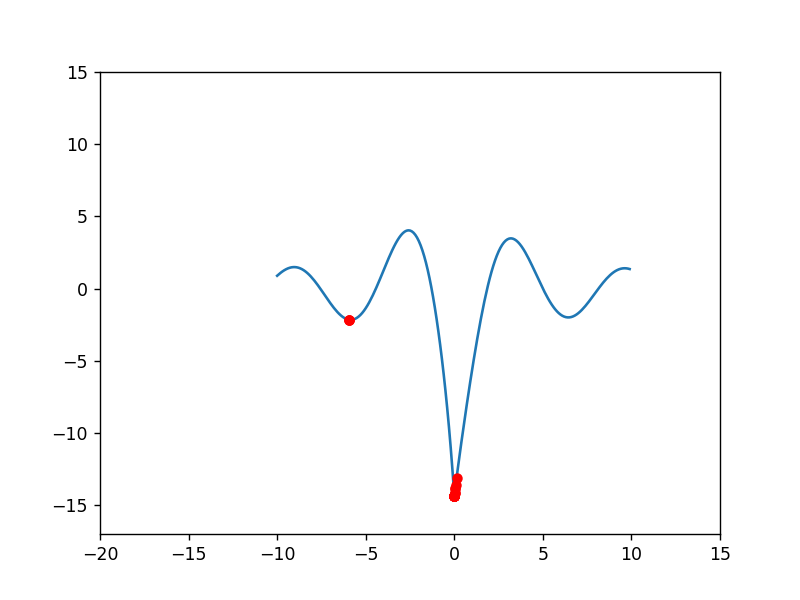

9.340530775953614e-05


In [5]:
fig, ax = subplots()
fig.show()

for k in range(num_iters):
    for i in range(particles):
        
        c1 = 2.5 - 2*(k/num_iters)
        c2 = 0.5 + 2*(k/num_iters)
        w = w_max-((w_max-w_min)*k)/num_iters
        
        distances = list(zip([distance(positions[i], other) for other in positions if other != positions[i]], range(particles)))
        
        distances.sort()
        
        neighbours_index = list(zip(*distances[:2]))[1]
        neighbours_index += (i,)
        
        neighbours = [positions[n] for n in neighbours_index]
        neighbours_best = neighbours[0]
        
        for n in neighbours:
            if(f(n) < f(neighbours_best)):
                neighbours_best = n
                
        r1, r2 = np.random.rand(), np.random.rand()
        
        velocities[i] = w*velocities[i] + c1*r1*(best_locals[i] - positions[i]) \
                            + c2*r2*(neighbours_best - positions[i])
        
        positions[i] += velocities[i]
        
        if(f(positions[i]) < f(best_locals[i])):
            best_locals[i] = positions[i]
            
        if(f(best_locals[i]) < f(neighbours_best)):
            neighbours_best = best_locals[i]
        
        
        ax.clear()
        ax.axis([-20,15,-17,15])
#         ax.axis([-10,10,-10,10])
        ax.plot(np.arange(-10, 10, 0.1), f(np.arange(-10, 10, 0.1)), '-')
        ax.plot(positions, f(positions), 'ro', markersize = 5)
        
        fig.canvas.draw()


lowest = np.argmin(f(positions))
print(positions[lowest])
        
